### <font color='red'> I am currently proofing and improving this tutorial, so please check back in a couple days! </font>

## Coding Club Mini-Tutorial: Biological Modeling with Differential Equations

**Author:** Jonas Hartmann @ Gilmour group @ EMBL Heidelberg

**Date:** 04.05.2017

**Abstract:** 

Differential Equations provide an intuitive and powerful mathematical framework for modeling and simulating dynamical systems, in particular bio-chemical systems such as signaling pathways, metabolic pathways, or gene regulatory circuits.

The basics of differential equation modeling are easy to grasp and readily applicable to learn something about any pathway of interest.

In this tutorial, you will learn how to transform typical "arrow schemes" of pathways into a set of Ordinary Differential Equations (ODEs), and how to use these ODEs to simulate a pathway and understand its dynamics.

### Motivation

From the perspective of a 'wet lab' biologist, quantitative modeling may appear to be a very difficult task that can only be done by a specialist and requires a lot of time and effort. However, **a tight loop between quantitative experimentation and quantitative theory is becoming increasingly important** in addressing the complex questions of modern biology. Just as quantitative data analysis complements human observation on the experimental side, quantitative modeling must complement human reasoning on the theoretical side.

For a 'wet lab' biologist, knowledge of differential equation modeling thus has many benefits:

- It provides the ability to **quickly create simple models** using basic equations
    - Just creating a model will help you think about the system differently!
    - Simple simulations are good sanity checks for hypotheses!
    
    
- It nurtures a better **intuition for dynamical systems**


- It improves the ability to **understand modeling stories** and to **collaborate with modelers**   

For those biologists (from 'wet lab' or 'dry lab') who get into differential equation modeling more deeply, a range of additional applications awaits:

- Creation of complicated models, including custom equations
- Fitting of parameters based on data
- Exploration of systems with parameter screens
- Prediction of wild-type and mutant outcomes
- Combination with different types of models (particle-based, vertex-based, cellular Pots, ...)

### Ordinary Differential Equations (ODEs)

Differential equations describe the relationship of `functions` with their `derivatives`. In practice, the `functions` represent properties of the system (such as the concentration of a protein) and the `derivatives` represent how these properties change over time. Differential equations are a natural way of describing systems whose state at time t<sub>1</sub> is in some way dependent on their state at t<sub>0</sub>.

The following is a simple example of an `Ordinary Differential Equation` (`ODE`). It describes the change ($\delta$) of a variable $X$ over time $t$ (written as $\frac{\delta X}{\delta t}$) based on the parameter $a$ and the variable $X$ itself.

\begin{equation*}
\frac{\delta X}{\delta t} =
a \cdot X
\end{equation*}

A slightly more complicated case would be a system of two `ODEs` where the state of one variable affects the rate of change of the other.

\begin{align}
\frac{\delta X}{\delta t} & = a \cdot X - b \cdot Y \\
\frac{\delta Y}{\delta t} & = c \cdot Y + d \cdot X
\end{align}

If $X$ is a function of multiple variables, we have a `Partial Differential Equation` (`PDE`). These are very useful to describe how the concentration of a protein changes both in time and in space (e.g. through diffusion). The example below is a `PDE` that includes diffusion, where $D$ is the coefficient of diffusion and $q$ is space; the second derivative of $X$ with regards to $q$ (written as $\frac{\delta ^2X}{\delta q^2}$) describes diffusion in space. *Note: this tutorial does not cover `PDEs`, as that would be beyond the scope of the mini-tutorial format.*

\begin{equation*}
\frac{\delta X}{\delta t} =
a \cdot X - D \frac{\delta ^2X}{\delta q^2} 
\end{equation*}

### From 'Arrows' to ODEs

As biologists, we are used to visualizing biochemical systems by means of `arrow schemes`.

<img src="ipynb_figures/simple_mutual_activation.png" alt="Simple Mutual Activation" style="width: 150px;"/>

Arrow schemes are simple and intuitive but also have many drawbacks. One crucial issue is that they are static and cannot represent any of the dynamics that might emerge from the biochemical system in question.

Fortunately, arrow schemes can very easily be translated into sets of ODEs which allow us to think about and simulate the dynamics of the system!

The set of ODEs describing the system above is:

\begin{align}
\frac{\delta A}{\delta t} & = -p \cdot A + r \cdot B\\
\frac{\delta B}{\delta t} & =  p \cdot A - r \cdot B\\
\end{align}

<center>*...where $p$ is a parameter describing the `rate` at which $A$ changes into $B$.*</center>

**How to find the ODEs:**

- Consider every reactant in the arrow scheme a `function` in the set of ODEs (here $A$ and $B$)
    - You need one ODE per reactant
  
  
- Every arrow between reactants shows up as a term in the ODEs of the reactants involved
    - The terms are always products of a characteristic `parameter` (here $p$) and the substrate(s) (here $A$)
    - In the ODE of the substrate (which gets removed), the term is negative (here $-p \cdot A$)
    - In the ODE of the product (which gets produced), the term is positive (here $p \cdot A$)
    

It may sound a bit complicated but it's really quite simple, as a few additional examples will illustrate.

---

**Example 1: Simplified Enzymatic Reaction**

Here's a simplified arrow scheme of an enzyme $E$ binding and converting a substrate $S$ to an (initially still bound as $EP$) product $P$:

<img src="ipynb_figures/simple_enzyme.png" alt="Simple Enzymatic Reaction" style="width: 300px;"/>

This translates to the following equations:

\begin{align}
\frac{\delta E}{\delta t} & = -b \cdot E \cdot S + d \cdot EP \\
\frac{\delta S}{\delta t} & =  -b \cdot E \cdot S \\
\frac{\delta EP}{\delta t} & =  b \cdot E \cdot S - d \cdot EP \\
\frac{\delta P}{\delta t} & =  d \cdot EP \\
\end{align}

Note that there are a number of simplifying assumptions here, namely that the intermediate state is modeled only by a complex of $EP$, which means the reaction of $S$ to $P$ is treated as instantaneous (relative to the binding and unbinding reactions). Consequently, there is no unbinding reaction of $E$ and $S$. There is also no spontaneous binding of $E$ and $P$ into $EP$, meaning that the affinity of the enzyme for the product is very low.

Simplifying assumptions like this can be legitimate, but it's important be clearly aware of them.

---

**Example 2: Ligand-Receptor Binding and Dimerization**

Here's a receptor $R$ that binds ligand $L$ and dimerizes upon ligand binding.

<img src="ipynb_figures/receptor_ligand_dimerization.png" alt="Receptor-Ligand Binding and Dimerization" style="width: 300px;"/>

This system could be modeled with the following ODEs:

\begin{align}
\frac{\delta R}{\delta t} & = -b \cdot L \cdot R + u \cdot LR \\
\frac{\delta L}{\delta t} & =  -b \cdot L \cdot R + u \cdot LR \\
\frac{\delta RL}{\delta t} & =  b \cdot L \cdot R - u \cdot LR - d \cdot RL \cdot RL + r \cdot RLLR \\
\frac{\delta RLLR}{\delta t} & =  d \cdot RL \cdot RL - r \cdot RLLR \\
\end{align}

---

**Example 3: Enhancer of Transcription**

Now we are looking at the expression and degradation of an $RNA$, both of which happen with a base rate $e$ and $d$, respectively. The expression is modulated by the concentration of a $TF$.

<img src="ipynb_figures/transcription_factor.png" alt="Transcriptional Enhancer" style="width: 170px;"/>

Because we don't model the modulation by $TF$ as a properly defined chemical reaction, we are more free in choosing what by what function we would like to relate the concentration of $TF$ to the production rate of $RNA$ (here, 'more free' also means more likely to make a mistake!).

As a starting point, let's simply choose a saturation curve where the maximum factor of expression increase $i_{max}$ is reached asympotically at a rate defined by the half-maximal TF concentration $TF_{1/2}$, similar to a `Michaelis-Menten Equation`.

\begin{align}
\frac{\delta R}{\delta TF}  & = 0 \\
\frac{\delta L}{\delta RNA} & = e \cdot (\frac{i_{max} \cdot TF}{TF_{1/2} + TF})  - d \cdot RNA \\
\end{align}

Note that $\frac{\delta R}{\delta TF} = 0$ means that we keep the concentration of $TF$ constant.

---

**Exercise 1: Double-Negative Positive Feedback Loops**

Convert this motif into the corresponding set of ODEs.

<img src="ipynb_figures/bistable.png" alt="DNPF Bistable Circuit" style="width: 300px;"/>

Your solution:

<br>
<font color='gray'>If you wish, you can use the TEX syntax to write the equations here (see the above examples to figure it out).<br>
Its probably easier to just do it by hand, though.</font><br>
<br>

Side note: this is an example of a `bistable` system, meaning that it will 'lock in' to either a state with high A and no B or a state with high B and no A. Which one it ends up in depends on the initial conditions.

---

**Exercise 2: Activator-Repressor Circuit**

Convert this motif into the corresponding set of ODEs.

<img src="ipynb_figures/activator_repressor.png" alt="Activator-Repressor Circuit" style="width: 300px;"/>

Your solution:

<br>
<font color='gray'>If you wish, you can use the TEX syntax to write the equations here (see the above examples to figure it out).<br>
Its probably better to just do it by hand, though.</font><br>
<br>

Side note: this is a classical `Gierer-Meinhardt activator-repressor motif`, the basis of many different mechanisms of patterning in space and time.

---
**<font color='red'>Important Note</font>**

Transforming an arrow scheme into a set of ODEs comes with some implicit assumptions:

- The [law of mass action](https://en.wikipedia.org/wiki/Law_of_mass_action) is assumed to apply


- The system is assumed to be 'well-stirred' (space/diffusion do not play a role in the system's dynamics)


- The number of reactants per reaction volume is assumed to be large enough to be accurately generalized as a 'concentration'
    - Otherwise, stochastic/particle-based models will yield far more accurate results
---

### Numerically Solving ODEs

Some ODEs can by solved `analytically`, meaning the equation can be rewritten to be expressed as a function of time directly. 

**Example ODE:**

\begin{align}
\frac{\delta X}{\delta t} & = a \cdot X - b 
\end{align}


**Analytical solution:**

\begin{align}
X(t) & = \frac{b}{a} + X_{t_0} \cdot e^{a \cdot t}
\end{align}

However, for most systems of ODEs we encounter in practive it turns out to be either impossible or at least very complicated to find an analytical solution. That's why the rest of this tutorial focuses on `numerical` solutions.

Numerical solutions are essentially `iterative algorithms`. Starting from the `initial conditions` (the state of the system at time $t_0$), we calculate how the system would change within a very small time step $\delta t$, which gives us the new state of the system at $t_1$. We then plug the concentrations at $t_1$ back into the equation to get the change for the next timestep and so forth.

**Numerical solution:**

\begin{align}
X_{t_1} & = X_{t_0} + \delta X_{t_0t_1} \\
& \\
X_{t_2} & = X_{t_1} + \delta X_{t_1t_2} \\
& \\
X_{t_3} & =\ ... \\
& \\
... \\
& \\
... \\
\end{align}

This kind of solution suffers from one problem: in reality, the $\delta t$ of the timesteps should be infinitesimally small (denoted as $dt$ instead of $\delta t$). For this kind of approach, however, we need to decide a finite $\delta t$, which means our solution will only be an approximation of the real solution. How well our approximation works depends on several things:

- **The size of $\delta t$:** smaller time steps yield better approximations but it takes more computational time to compute the solution


- **The ODEs themselves:** in some systems the error of the approximation will remain small, in others it can propagate and amplify so that the numerical solution gets more and more wrong as time goes on.


- **How $\delta X_{t_nt_{n+1}}$ is calculated:** there are different ways of calculating this term. The most straightforward (but also error-prone) approach is `Euler's Method`, shown below. Most numerical solvers built into computational packages (such as python's `scipy.integrate.odeint` function) use more advanced methods.

**Numerical solution by Euler's Method:**

\begin{align}
X_{t_1} & = X_{t_0} + \delta X_{t_0t_1} = X_{t_0} + (a \cdot X_{t_0} - b) \cdot \delta t_{t_0t_1}  \\
& \\
X_{t_2} & = X_{t_1} + \delta X_{t_1t_2} = X_{t_1} + (a \cdot X_{t_1} - b) \cdot \delta t_{t_1t_2}  \\
& \\
... \\
& \\
... \\
& \\
... \\
\end{align}

### Yes, you can do this in Excel...

Euler's Method for numerically solving ODEs is so simple that it can very easily be done in spreadsheet software such as Microsoft Office Excel. Because this is very graphical and interactive, it's a great way of getting to understand how numerical integration works in practice.

*The file `enzymatic_reaction.xlsx` contains an example numerical simulation of the simplified enzymatic reaction scheme discussed previously:*

<img src="ipynb_figures/simple_enzyme.png" alt="Simple Enzymatic Reaction" style="width: 300px;"/>

Note that a plot of the reaction rate ($\frac{\delta P}{\delta t}$) over the initial substrate concentration $S$ shows the kind of saturation behavior that we would expect from a Michaelis-Menten type system. This simplified representation of an enzymatic reaction thus recapitulates one of the most fundamental dynamic properties of enzymatic reactions in general.


---

**Exercise 3: Numerical Simulation in a Spreadsheet**

Use your favorite spreadsheet software to numerically solve the *Double-Negative Positive Feedback Loops* motif. Play with initial conditions, parameters and visualizations; try to find a visualization that illustrates the `bistability` of this system.

<img src="ipynb_figures/bistable.png" alt="DNPF Bistable Circuit" style="width: 300px;"/>


### ODE Modeling with Python

While spreadsheet software is nice as a starting point for playing around with ODEs, it is recommended to swiftly move on to an actual programming language, as they provide better numerical solvers and more flexibility in making measurements and creating visualizations of the systemp's dynamic behavior.

Here is an example script that illustrates how to numerically solve the simplified enzymatic reaction from above.

<img src="ipynb_figures/simple_enzyme.png" alt="Simple Enzymatic Reaction" style="width: 300px;"/>

\begin{align}
\frac{\delta E}{\delta t} & = -b \cdot E \cdot S + d \cdot EP \\
\frac{\delta S}{\delta t} & =  -b \cdot E \cdot S \\
\frac{\delta EP}{\delta t} & =  b \cdot E \cdot S - d \cdot EP \\
\frac{\delta P}{\delta t} & =  d \cdot EP \\
\end{align}

(200L, 4L)


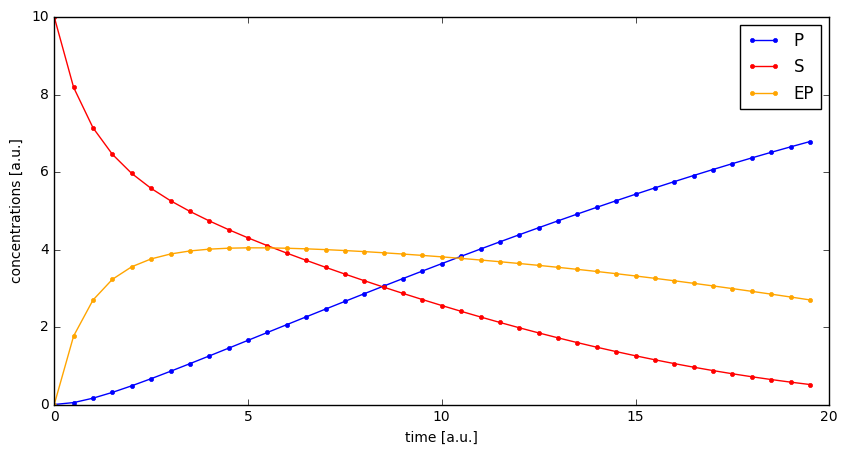

In [1]:
# Parameters
b = 0.1
d = 0.1
params = (b,d)

# Initial conditions
E_0  = 5
S_0  = 10
P_0  = 0
EP_0 = 0
ini = (E_0,S_0,P_0,EP_0)

# Time
dt = 0.1
import numpy as np
t = np.arange(0,20,dt)

# ODE system (in format used for odeint)
def myODE(u,t,params):
    
    # Unpack parameters and current state
    b,d = params
    E, S, EP, P  = u[0], u[1], u[2], u[3]
    
    # Calculate derivatives
    dE  = -b * E * S + d * EP
    dS  = -b * E * S
    dEP =  b * E * S - d * EP
    dP  =  d * EP
    
    # Return results
    return (dE,dS,dEP,dP)

# Solve using odeint
from scipy.integrate import odeint
solution = odeint(myODE,ini,t,args=(params,))
print np.shape(solution)
Et  = solution[:,0]
St  = solution[:,1]
EPt = solution[:,2]
Pt  = solution[:,3]

# Show plot over time
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(t[::5],Pt[::5],'.-',color='blue',label='P',lw=1)
plt.plot(t[::5],St[::5],'.-',color='red',label='S',lw=1)
plt.plot(t[::5],EPt[::5],'.-',color='orange',label='EP',lw=1)
plt.xlabel("time [a.u.]")
plt.ylabel("concentrations [a.u.]")
plt.legend()
plt.show()

---

**Exercise 4: Numerical Simulation in Python**

Understand how the code above works and modify it to simulate a system of your choice, either one of those shown above or one that you come up with yourself. Play with the parameters and initial conditions and try to understand the dynamic behavior of your system of choice.

In [ ]:
### Your code here...

### Final Words: Models are Models are Models

When working with mathematical models like these, it is important to keep in mind that they are **just** models. Always remember that you are simplifying reality quite a lot to arrive at the model, and that there are a number of underlying assumptions in the math itself. It is thus crucial to check simulation outcomes carefully and to have a tight integration with actual experimental results. **Speculation is still speculation, even if you are putting numbers on it with a quantitative model.**

On the flipside, these are not **just** models. They are quantitative, mathematically rigorous models that tend to encourage us to make our simplifications and assumptions *explicit*. This is a great advantage over the more informal theoretical reasoning we usually employ when thinking about our systems and experiments!

### <font color='red'>Updates to this Tutorial</font>

It should be noted that this tutorial was put together rather hastily, especially the second half. I am planning on going through everthing again in the next few days to add some more stuff and iron out some problems! In the meantime, any feedback is of course very welcome!